In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv('sign_mnist_train.csv')
test= pd.read_csv('sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels= train['label'].values

In [5]:
unique_val=np.array(labels)

In [6]:
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [7]:
from matplotlib import figure

<AxesSubplot:ylabel='count'>

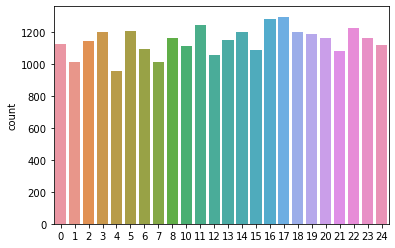

In [8]:
#plt.figure(figsize=(9,4))
sns.countplot(x=labels)

In [9]:
train.drop('label', axis=1, inplace= True)

In [10]:
images= train.values
images= np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [11]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer= LabelBinarizer()
labels= label_binrizer.fit_transform(labels)

In [12]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


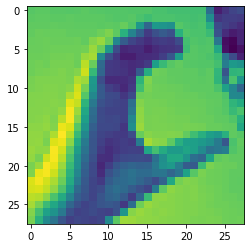

In [13]:
index= 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [14]:
import cv2
import numpy as np

for i in range(0,10):
    rand= np.random.randint(0, len(images))
    input_im= images[rand]
    sample= input_im.reshape(28,28).astype (np.uint8)
    sample= cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [16]:
!pip install Tensorflow

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size= 128
num_classes= 24
epochs= 13

In [18]:
x_train= x_train/255
x_test= x_test/255

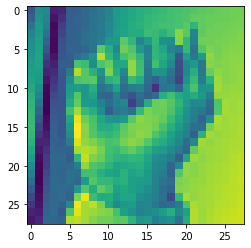

In [19]:
x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test= x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0].reshape(28,28))

In [24]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Conv2D (64, kernel_size= (3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D (64, kernel_size= (3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation= 'softmax'))



In [25]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [26]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [27]:
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= epochs, batch_size= batch_size)

Epoch 1/13
151/151 [==============================] - 17s 108ms/step - loss: 2.5133 - accuracy: 0.2323 - val_loss: 1.5058 - val_accuracy: 0.5192
Epoch 2/13
151/151 [==============================] - 16s 107ms/step - loss: 1.1467 - accuracy: 0.6107 - val_loss: 0.7443 - val_accuracy: 0.7622
Epoch 3/13
151/151 [==============================] - 17s 111ms/step - loss: 0.7080 - accuracy: 0.7561 - val_loss: 0.4612 - val_accuracy: 0.8574
Epoch 4/13
151/151 [==============================] - 17s 110ms/step - loss: 0.4722 - accuracy: 0.8418 - val_loss: 0.3073 - val_accuracy: 0.9075
Epoch 5/13
151/151 [==============================] - 16s 108ms/step - loss: 0.3193 - accuracy: 0.8955 - val_loss: 0.2191 - val_accuracy: 0.9357
Epoch 6/13
151/151 [==============================] - 17s 115ms/step - loss: 0.2186 - accuracy: 0.9302 - val_loss: 0.1302 - val_accuracy: 0.9654
Epoch 7/13
151/151 [==============================] - 14s 91ms/step - loss: 0.1552 - accuracy: 0.9512 - val_loss: 0.0820 - val_acc

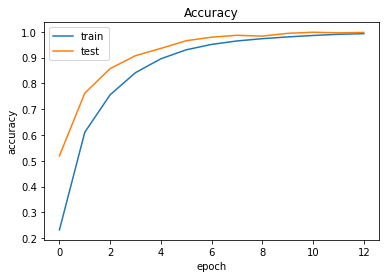

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [31]:
test_labels= test['label']
test.drop('label', axis=1, inplace= True)

test_images= test.values
test_images= np.array([np.reshape(i, (28,28)) for i in test_images])
test_images= np.array([i.flatten() for i in test_images])

test_labels= label_binrizer.fit_transform(test_labels)
test_images= test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape
y_pred= model.predict(test_images)

225/225 [==============================] - 2s 6ms/step


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.7856943669827106